# Controls charts&mdash;individual and moving range (XmR)

# In brevi

Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The chart can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DRld4MndVT2R0dEk). It consists of a "Date" column and an "X" column of floats or integers. Dates are entered using [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) date format (yyyy-mm-dd).

# Methodology

The first charts presented here are the individual and moving range control charts, also called XmR or ImR. The data are collected using rational samples. The individual values (sample size is one) are plotted in time order, a central line (average) is plotted, and control limits above and below the central line are plotted.


In [1]:
# Import the required libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in column X.
# Set "date" as the index.
x_values = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')

In [3]:
# Define for the X chart the graph title and subtitle, and the x and y axis labels.
x_chart_title = 'X Control Chart'
x_chart_subtitle = 'Travel Cost'
x_chart_ylabel = 'Travel Cost (USD)'
x_chart_xlabel = 'Date'
number_months = 8

In [4]:
# Define for the mR chart the graph title and subtitle, and the x and y axis labels.
mr_chart_title = 'mR Control Chart'
mr_chart_subtitle = 'Travel Cost Difference'
mr_chart_ylabel = 'Travel Cost Difference (USD)'
mr_chart_xlabel = 'Date'

In [5]:
# X chart central lines
# Calculate a column of median values.
x_values['Median'] = x_values['X'].median()
# Calculate a column of average values.
x_values['Average'] = x_values['X'].mean()
# Calculate a column of monthly average values.
x_values['Monthly average'] = x_values['X'].sum(axis=0)/number_months

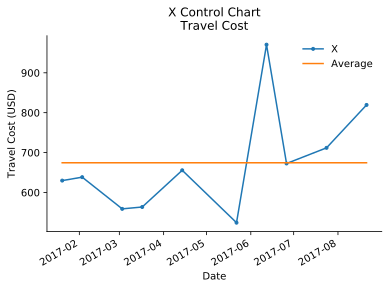

In [6]:
# Create a graph of "individual values v. date".

# Create a single subplot.
# Plot "individual values v. date".
ax = x_values[['X']].plot.line(legend=False, marker='o', markersize=3)
x_values['Average'].plot.line(legend=True, ax=ax).axis('auto')
#x_values['Monthly average'].plot.line(legend=True, ax=ax).axis('auto')
#x_values['Median'].plot.line(legend=True, ax=ax).axis('auto')
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Remove the box around the legend.
ax.legend(frameon=False)
# Save the graph as svg and pdf.
ax.figure.savefig('xmr.svg', format='svg')
ax.figure.savefig('xmr.pdf', format='pdf')

In [7]:
# Calculate a column of absolute moving range values
x_values['MR'] = abs(x_values['X'] - x_values['X'].shift(periods=1))

In [8]:
# mR chart central line
# Calculate a column of average moving range values.
x_values['Average moving range'] = x_values['MR'].mean()

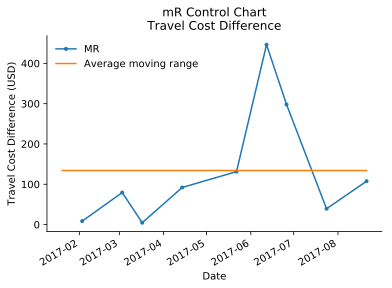

In [9]:
# Create a graph of "moving range values v. date".

# Create a single subplot.
# Plot "moving range v. date".
ax = x_values[['MR']].plot.line(legend=False, marker='o', markersize=3)
x_values['Average moving range'].plot.line(legend=True, ax=ax).axis('auto')
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(mr_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(mr_chart_xlabel)
# Remove the box around the legend.
ax.legend(frameon=False)
# Save the graph as svg and pdf.
ax.figure.savefig('mr.svg', format='svg')
ax.figure.savefig('mr.pdf', format='pdf')

# Control chart formulae

## Individuals chart (X)

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range of sample size 2, and for this situation, $d_2$ = 1.128.

## Moving range chart (mR)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ changes as the subgroup size n changes. It is common to use a moving range of sample size 2, and for this situation, $d_3$ = 0.8525.

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.

# Still to do

- Calculate moving range and put in a column
- Calculate upper control limit using rational subgroup formula and put in column
- Plot control limits using sold red lines for the individual control chart
- Plot moving range on mR control chart
- Calucate upper control limit for average moving range and put in column
- Plot control limits using solid red lines for the moving range control chart
- Add code to validate dates are correct